In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("../data/miniterrain.csv")

In [3]:
df.head()

,bumpiness,grade,target
0,0.832143,0.980161,1.0
1,0.530852,0.934583,1.0
2,0.069974,0.502007,0.0
3,0.414885,0.056444,0.0
4,0.633748,0.897043,1.0


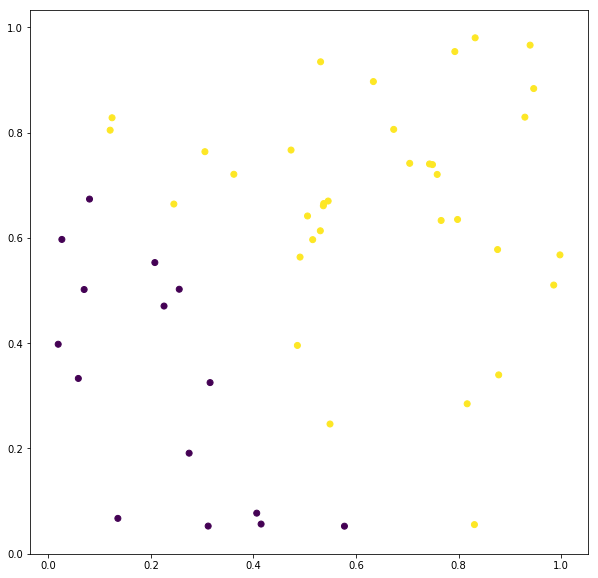

In [4]:
plt.figure(figsize=(10,10))
plt.scatter(df["bumpiness"],df["grade"],c=df["target"])
plt.show()

In [5]:
# We need to find a line that separates one class and the other. For example. this one:

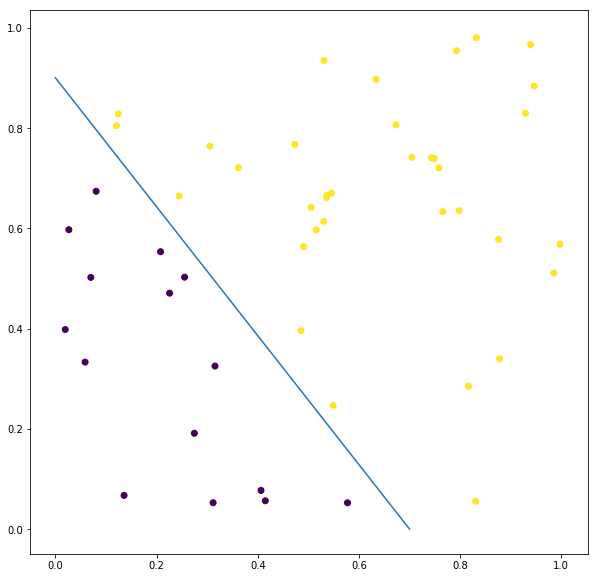

In [6]:
plt.figure(figsize=(10,10))
plt.scatter(df["bumpiness"],df["grade"],c=df["target"])
plt.plot([0,0.7],[0.9,0])
plt.show()

In [7]:
# But there are infinite lines that could cut the dataset in 2

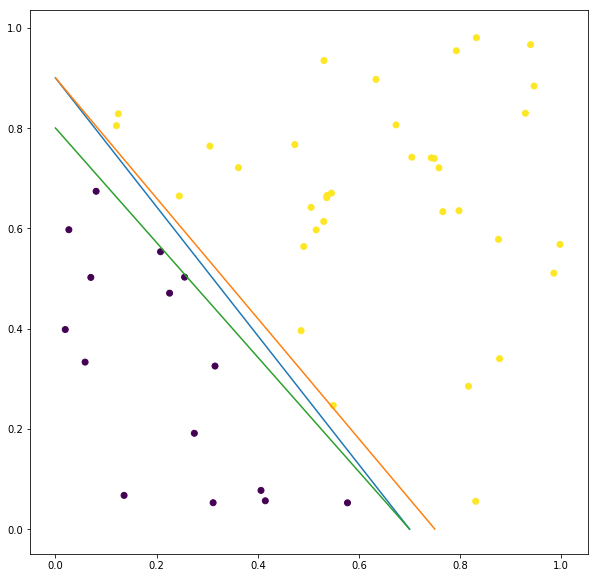

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(df["bumpiness"],df["grade"],c=df["target"])
plt.plot([0,0.7],[0.9,0])
plt.plot([0,0.75],[0.9,0])
plt.plot([0,0.7],[0.8,0])
plt.show()

In [9]:
# We need to find the one which maximizes the margin to the separating line. Let's take the original line 
# and let's draw the margins for each point

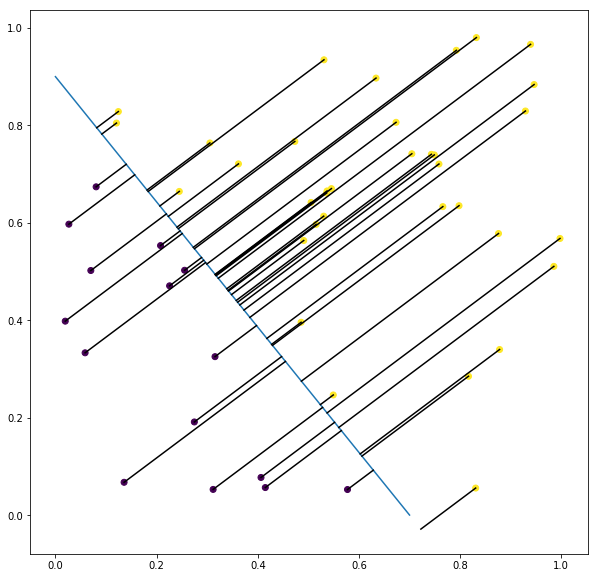

In [10]:
import math

x1=0.0
y1=0.9
x2=0.7
y2=0.0

plt.figure(figsize=(10,10))
plt.scatter(df["bumpiness"],df["grade"],c=df["target"])
plt.plot([0,0.7],[0.9,0])


for x3,y3 in df[["bumpiness","grade"]].values:
    # first convert line to normalized unit vector
    dx = x2 - x1
    dy = y2 - y1
    mag = math.sqrt(dx*dx + dy*dy)
    dx /= mag
    dy /= mag

    #translate the point and get the dot product
    l = (dx * (x3 - x1)) + (dy * (y3 - y1))
    x4 = (dx * l) + x1
    y4 = (dy * l) + y1
    
    plt.plot([x4,x3],[y4,y3],color="black" )
    
plt.show()

In [11]:
# But in reality, we see that only the points that are next to the separating line are the ones used to find 
# the line and the maximum margin

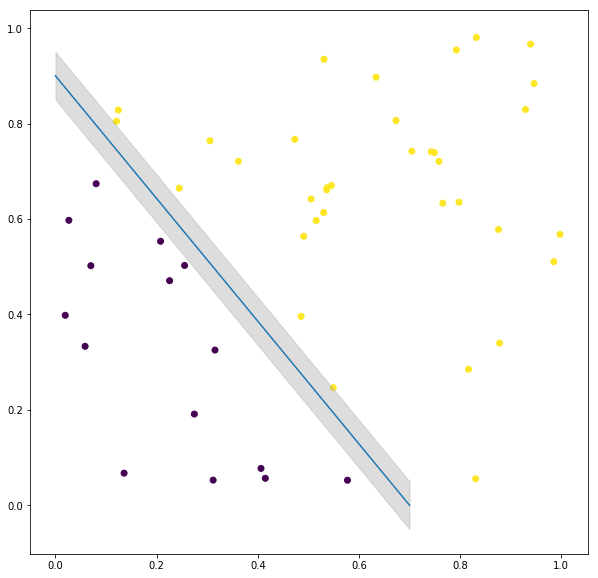

In [12]:
plt.figure(figsize=(10,10))
plt.scatter(df["bumpiness"],df["grade"],c=df["target"])
plt.plot([0,0.7],[0.9,0])
plt.fill_between([0,0.7],[0.95,0.05],[0.85,-0.05], edgecolor='none', color='#AAAAAA', alpha=0.4)
plt.show()

In [13]:
# Those points that are nearest to the line are called the SUPPORT VECTORS. 

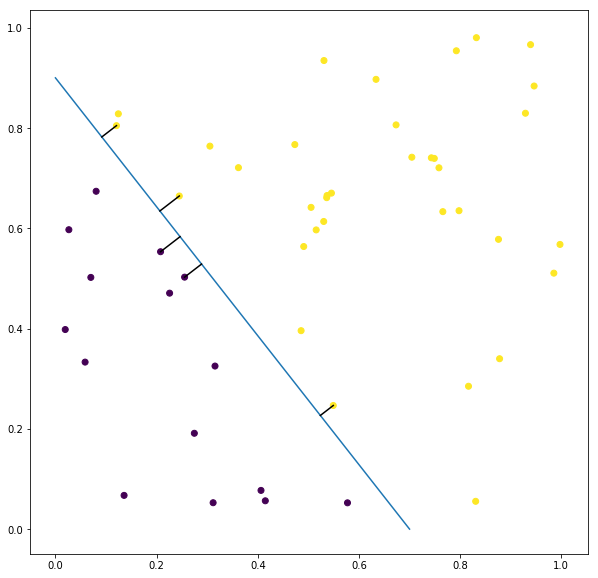

In [14]:
import math

x1=0.0
y1=0.9
x2=0.7
y2=0.0

plt.figure(figsize=(10,10))
plt.scatter(df["bumpiness"],df["grade"],c=df["target"])
plt.plot([0,0.7],[0.9,0])

d=[]

for x3,y3 in df[["bumpiness","grade"]].values:
    # first convert line to normalized unit vector
    dx = x2 - x1
    dy = y2 - y1
    mag = math.sqrt(dx*dx + dy*dy)
    dx /= mag
    dy /= mag

    #translate the point and get the dot product
    l = (dx * (x3 - x1)) + (dy * (y3 - y1))
    x4 = (dx * l) + x1
    y4 = (dy * l) + y1
    
    d.append([(x3-x4)**2+(y3-y4)**2,x3,y3])
    

d = sorted(d,key=lambda e: e[0])
d = list(map(lambda e: [e[1],e[2]],d))
d = d[:5]

for x3,y3 in d:
    # first convert line to normalized unit vector
    dx = x2 - x1
    dy = y2 - y1
    mag = math.sqrt(dx*dx + dy*dy)
    dx /= mag
    dy /= mag

    #translate the point and get the dot product
    l = (dx * (x3 - x1)) + (dy * (y3 - y1))
    x4 = (dx * l) + x1
    y4 = (dy * l) + y1
    

    plt.plot([x4,x3],[y4,y3],color="black" )
    
plt.show()

In [15]:
# Let's put the data in a compliant form and use the sklearn method
from sklearn.svm import SVC

X = df[["bumpiness","grade"]].values
y = df["target"]

clf = SVC(kernel='linear',C=100)
clf.fit(X, y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

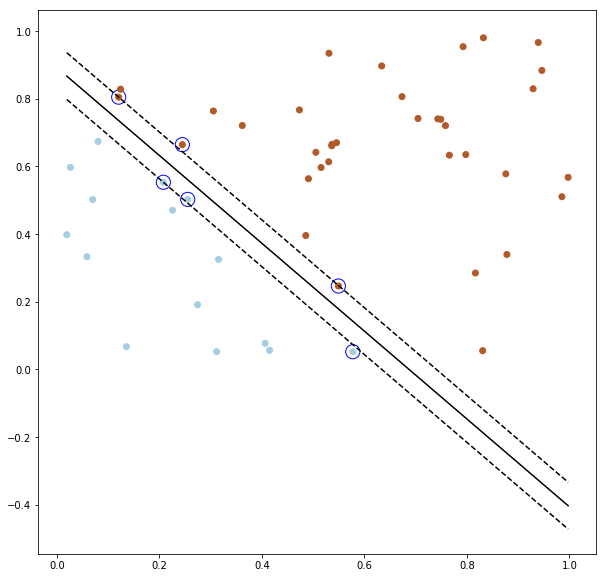

In [16]:
# From here: http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py
import numpy as np
plt.figure(figsize=(10,10))
    
#plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
#plt.plot(clf.)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], color="none",edgecolor="blue",s=200)
# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]))
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

plt.show()

In [17]:
# We have highlighted the support vectors, the hyperplane.

In [18]:
# Now we can segment the space to find the output of the classifier

In [20]:
def represent_clf(clf,X,y,h = .1,show=False):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10,10))
    plt.scatter(xx, yy,c=Z)
    if show:
        plt.scatter(X[:,0],X[:,1],c=y,cmap="rainbow")
    return plt.show()

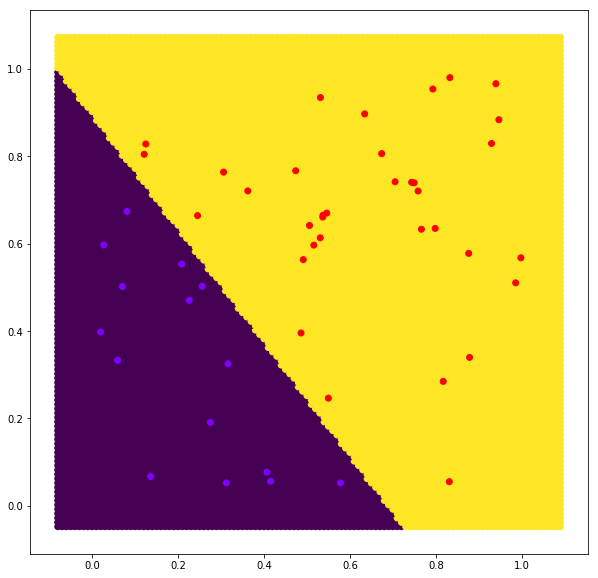

In [22]:
represent_clf(clf,X,y,0.01,True)

In [79]:
# Now this was just with a subset. Let's put all the points.

In [44]:
df = pd.read_csv("../data/terrain.csv")

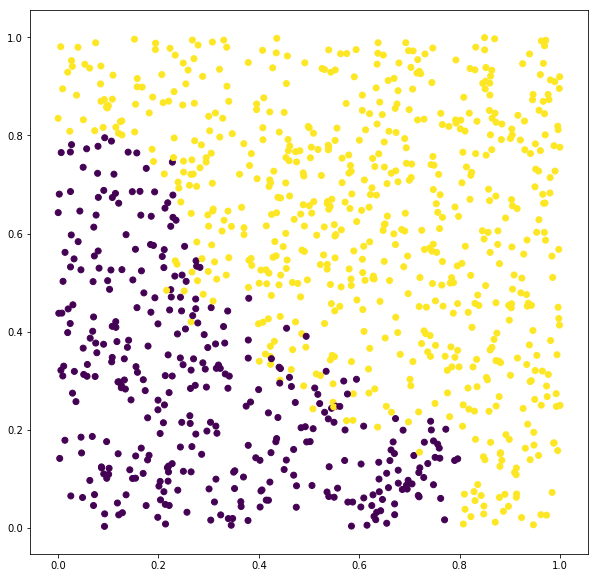

In [45]:
plt.figure(figsize=(10,10))
plt.scatter(df["bumpiness"],df["grade"],c=df["target"])
plt.show()

In [46]:
X = df[["bumpiness","grade"]].values
y = df["target"]

clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

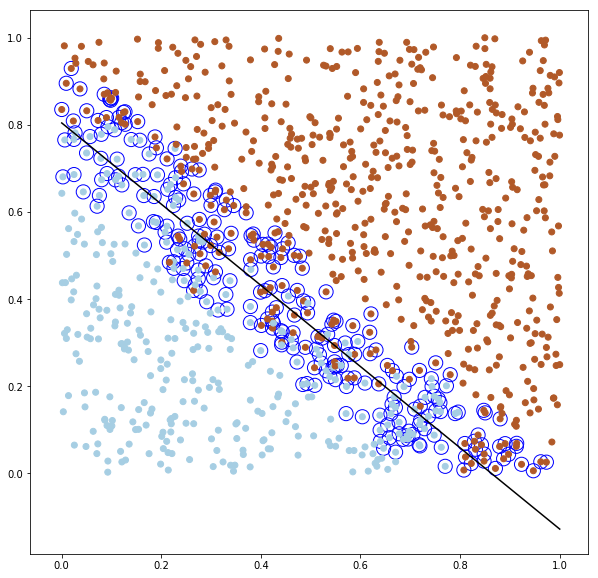

In [47]:
# From here: http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py
import numpy as np
plt.figure(figsize=(10,10))
    
#plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
#plt.plot(clf.)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], color="none",edgecolor="blue",s=200)
# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]))
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')


plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

plt.show()

In [48]:
# We see that the margin is now soft and more support vectors are now used.

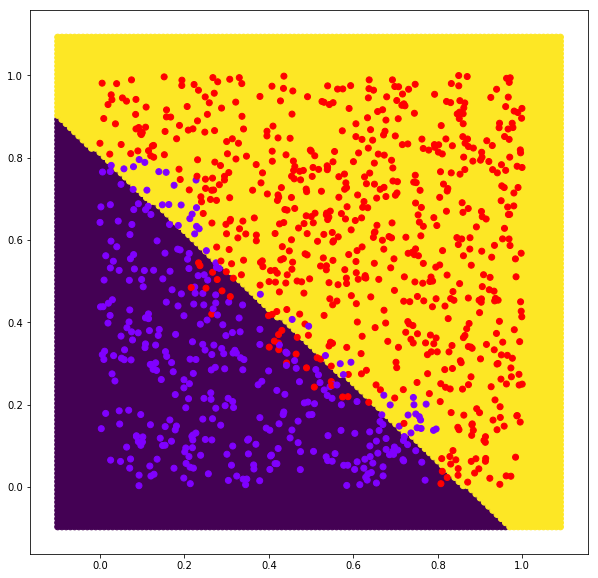

In [49]:
represent_clf(clf,X,y,.01,True)

In [28]:
# Accuracy
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf,X,y,cv=10,scoring="accuracy"))

0.98333333333333339

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
clf_good = GridSearchCV(SVC(),param_grid={'kernel': ['linear'], 'C': [1, 10, 100, 1000]},scoring="accuracy")

In [31]:
np.mean(cross_val_score(clf_good,X,y,cv=10,scoring="accuracy"))

0.95833333333333337

In [32]:
clf_good.fit(X,y)
print(clf_good.best_params_)

{'C': 10, 'kernel': 'linear'}


In [33]:
# Let's take a pause and look to a more complicated theoretical case:

In [34]:
df = pd.read_csv("../data/points.csv")

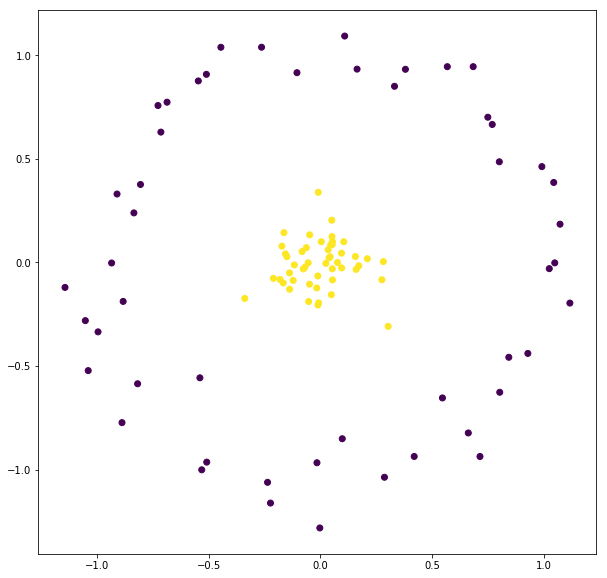

In [35]:
plt.figure(figsize=(10,10))
plt.scatter(df["X"],df["Y"],c=df["target"])
plt.show()

In [36]:
X = df[["X","Y"]].values
y = df["target"]

clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

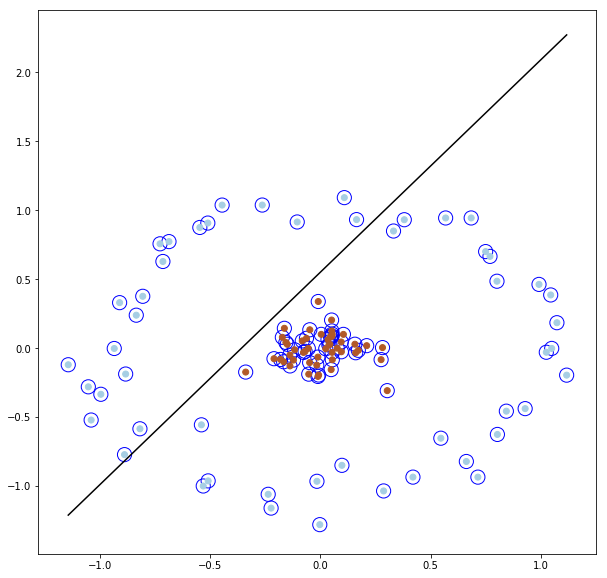

In [37]:
# From here: http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py
import numpy as np
plt.figure(figsize=(10,10))
    

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], color="none",edgecolor="blue",s=200)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]))
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')


plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

plt.show()

In [38]:
# There's no line separating both spaces. So we can use a trick to still use a plane to separate. 
# Let's add a feature

In [39]:
df["Z"]=df["X"]**2+df["Y"]**2

In [40]:
X = df[["X","Y","Z"]].values
y = df["target"]

clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [41]:
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
py.iplot([go.Scatter3d(x=X[:, 0], y=X[:, 1], z=X[:, 2],mode="markers",marker={"color":y})])

In [92]:
"""from mpl_toolkits import mplot3d
plt.figure(figsize=(10,10))
ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2],c=y)
ax.view_init(elev=30, azim=180)
plt.show()"""

"from mpl_toolkits import mplot3d\nplt.figure(figsize=(10,10))\nax = plt.subplot(projection='3d')\nax.scatter3D(X[:, 0], X[:, 1], X[:, 2],c=y)\nax.view_init(elev=30, azim=180)\nplt.show()"

In [51]:
df = pd.read_csv("../data/terrain.csv")
X = df[["bumpiness","grade"]].values
y = df["target"]

In [52]:
clf_good = GridSearchCV(SVC(),param_grid=[{'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
                                          {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
                                         {'kernel': ['poly'],'C': [1, 10, 100, 1000],"degree":range(2,10)}]
                                          ,scoring="accuracy",
                                          cv=10)

In [53]:
clf_good.fit(X,y)
print(clf_good.best_params_)

{'C': 1000, 'degree': 4, 'kernel': 'poly'}


In [54]:
nclf=SVC(**clf_good.best_params_)
nclf

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [55]:
np.mean(cross_val_score(nclf,X,y,cv=10,scoring="accuracy"))

0.93700550055005505

In [56]:
nclf.fit(X,y)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

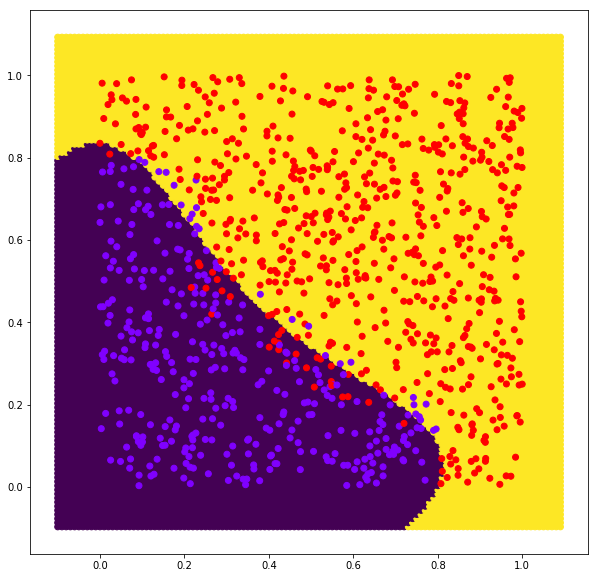

In [59]:
represent_clf(nclf,X,y,0.01,True)

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
confusion_matrix(nclf.predict(X_test),y_test)

array([[107,  12],
       [  9, 202]], dtype=int64)

In [63]:
import seaborn as sns

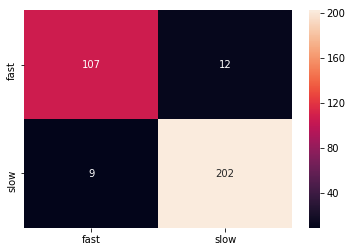

In [64]:
df_cm = pd.DataFrame(
        confusion_matrix(nclf.predict(X_test),y_test), index=["fast","slow"], columns=["fast","slow"], 
    )
fig = plt.figure()
sns.heatmap(df_cm, annot=True, fmt="d")

![alt text](https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg "Logo Title Text 1")



In [65]:
from sklearn.metrics import classification_report
print(classification_report(nclf.predict(X_test),y_test))

             precision    recall  f1-score   support

        0.0       0.92      0.90      0.91       119
        1.0       0.94      0.96      0.95       211

avg / total       0.94      0.94      0.94       330

